<a href="https://colab.research.google.com/github/M-Yerro/IA2025/blob/main/19-IA2025%20NotebookBase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
plt.switch_backend('Agg')
%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

url = "https://github.com/M-Yerro/IA2025/raw/refs/heads/main/19-IA2025%20medical_insurance.csv"
df = pd.read_csv(url)

print("Dataset loaded successfully. First 5 rows:")
display(df.head())

Dataset loaded successfully. First 5 rows:


,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0


In [2]:
# Display first few rows
df.head()

# Check for missing values in each column
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values[missing_values > 0])

# Data types check
print('\nData types:')
print(df.dtypes)

# Convert date columns if any were inferred (in our dataset there are no explicit date fields)
# If there were a date column, you may use pd.to_datetime(df['date_column'])

# For categorical features, ensure they are in the proper type
categorical_cols = ['sex', 'region', 'urban_rural', 'education', 'marital_status', 'employment_status', 'smoker', 'alcohol_freq', 'plan_type', 'network_tier']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Verify the changes
print('\nUpdated data types:')
print(df.dtypes)

Missing values in each column:
alcohol_freq    30083
dtype: int64

Data types:
person_id                        int64
age                              int64
sex                             object
region                          object
urban_rural                     object
income                         float64
education                       object
marital_status                  object
employment_status               object
household_size                   int64
dependents                       int64
bmi                            float64
smoker                          object
alcohol_freq                    object
visits_last_year                 int64
hospitalizations_last_3yrs       int64
days_hospitalized_last_3yrs      int64
medication_count                 int64
systolic_bp                    float64
diastolic_bp                   float64
ldl                            float64
hba1c                          float64
plan_type                       object
network_tier            

R2 Score: 0.5992
Mean Squared Error: 3943725.8096


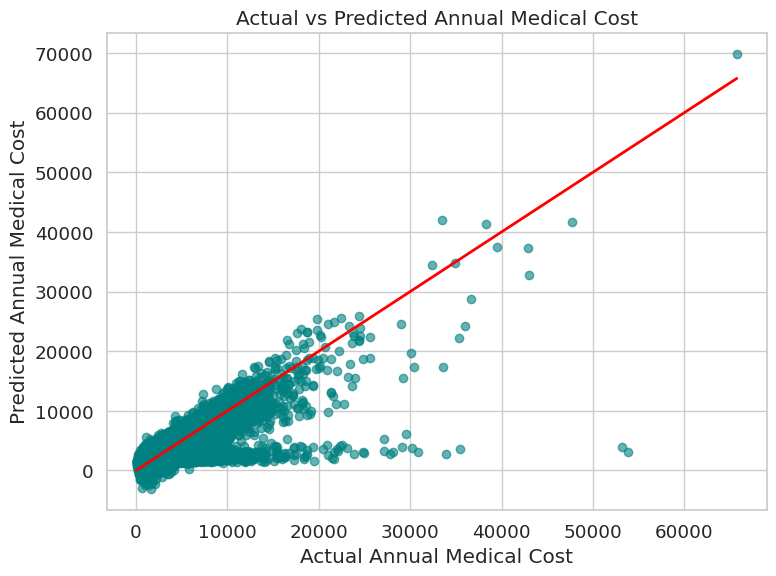

In [3]:
# Define the target and feature set
target = 'annual_medical_cost'

# Exclude identifiers and the target from features
exclude_cols = ['person_id', target, 'annual_premium','monthly_premium']
features = df.drop(columns=exclude_cols, errors='ignore')

# Identify categorical and numerical columns from the remaining features
categorical_features = features.select_dtypes(include=['category', 'object']).columns.tolist()
numerical_features = features.select_dtypes(include=[np.number]).columns.tolist()

# One-hot encode categorical variables
features_encoded = pd.get_dummies(features, columns=categorical_features, drop_first=True)

# Define X and y for modeling
X = features_encoded
y = df[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'R2 Score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

# For visual inspection, plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.xlabel('Actual Annual Medical Cost')
plt.ylabel('Predicted Annual Medical Cost')
plt.title('Actual vs Predicted Annual Medical Cost')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.tight_layout()
plt.show()